# Determinism in error cases

The objective here is to see how unique the error cases are across multiple trainings. The model was trained 10 times and error samples were stored. The accuracy of the model across the runs was very similar (close to 98.4%).

A error dictionary is created over multiple runs and another dictionary captures the number of times an error case appeared over 10 runs.

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class errCase(object):
    def __init__(self, index, x, y, pred_y):
        self.index = index
        self.x = x
        self.img = x.reshape(28, 28)
        self.y = int(y)
        self.pred_y = pred_y


In [3]:
errFreq = []
errCount = dict()
errDict = dict()
total_errors = 0
for i in range(10):
    errDict_ = pickle.load( open( "mnistfail.data" + str(i), "rb" ) )
    total_errors += len(errDict_)
    for index, error in errDict_.items():
        errDict[index] = error
        if index in errCount:   
            errCount[index] += 1
        else:
            errCount[index] = 1

unique_errors = len(errCount)

for i in range(11):
    errFreq.append(0)
    
for index, count in errCount.items():
    errFreq[count] += 1

# Results
The bar graph below shows how grequently the unique errors showed up across 10 runs. Out of 238 unique error samples, 90 were incorrectly predicted in all runs. 37 were unique to a single run. Overall the determinism was more than I expected.


total errors over 10 runs = 1560
Unique errors over 10 runs = 238


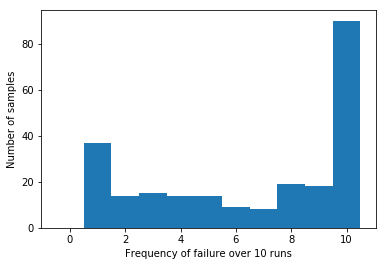

[0, 37, 14, 15, 14, 14, 9, 8, 19, 18, 90]


In [4]:
print("total errors over 10 runs = " + str(total_errors))
print("Unique errors over 10 runs = " + str(unique_errors))
plt.bar(range(11), errFreq, 1)
plt.xlabel('Frequency of failure over 10 runs')
plt.ylabel('Number of samples')
plt.show()
print(errFreq)
